# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [8]:
import numpy as np
import pandas as pd

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/amir.ziai/Downloads/traffic-signs-data/train.p'
testing_file = '/Users/amir.ziai/Downloads/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [43]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

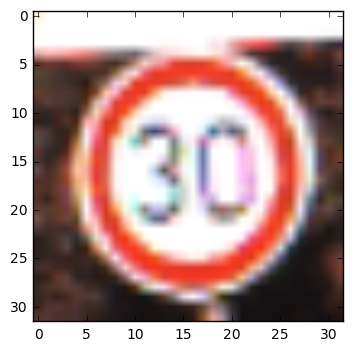

In [5]:
plt.imshow(X_train[400]);

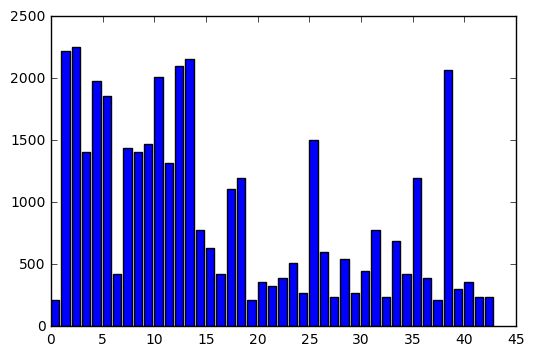

In [6]:
# Number of signs per category
plt.bar(np.unique(y_train), np.bincount(y_train));

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** breaking the train data into train and validation so the test data is not bleeding into train data and I can perform hyper paramter optimization/explore different parameters. Using a single channel/gray scale (for simplicity of the architecture) with normalized pixels (easier job for gradient descent).

In [ ]:
from sklearn.model_selection import train_test_split
from functools import reduce

In [ ]:
def normalize(image_data, a=0.1, b=0.9):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    num = (image_data - np.min(image_data)) * (b - a)
    den = np.max(image_data) - np.min(image_data)
    return a + num / den

def grayscale(images):
    """"""
    output = (0.299 * images[:, :, :, 0] + 
            0.587 * images[:, :, :, 1] +
            0.114 * images[:, :, :, 2]) / 3
    return output.reshape(*output.shape, 1)

def compose_pipeline(functions):
    return reduce(lambda f, g: lambda x: g(f(x)), functions, lambda x: x)

In [ ]:
# split the train dataset into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train,
                                                                y_train,
                                                                test_size=0.33)

# grayscale and then normalize
pipeline_functions = [
    grayscale,
    normalize
]
pipeline = compose_pipeline(pipeline_functions)
X_train = pipeline(X_train)
X_validation = pipeline(X_validation)
X_test = pipeline(X_test)

assert X_train.shape == (26270, 32, 32, 1)
assert X_validation.shape == (12939, 32, 32, 1)
assert X_test.shape == (12630, 32, 32, 1)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** didn't generate fake data and didn't try to balance the classes. This could help with accuracy. Model seems to perform well without these but they can be good optimizations.

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [ ]:
EPOCHS = 20
BATCH_SIZE = 128

In [ ]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 (used to be 10).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** used the LeNet structure from class, just changed the number of classes to 43.

In [135]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.381

EPOCH 2 ...
Validation Accuracy = 0.690

EPOCH 3 ...
Validation Accuracy = 0.786

EPOCH 4 ...
Validation Accuracy = 0.837

EPOCH 5 ...
Validation Accuracy = 0.875

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 7 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.935

EPOCH 12 ...
Validation Accuracy = 0.941

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.952

EPOCH 15 ...
Validation Accuracy = 0.954

EPOCH 16 ...
Validation Accuracy = 0.953

EPOCH 17 ...
Validation Accuracy = 0.957

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.956

EPOCH 20 ...
Validation Accuracy = 0.961

Model saved


In [137]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.881


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** used 20 epochs as the validation accuracy was not plateauing with 10. Used the Adam optimizer with learning rate of 0.001. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** LeNet architecture, Adam optimizer, learning rate of 0.001. As validation accuracy was dropping healthily with default parameters didn't have to do much tuning other than to increase number of epochs.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

**Answer:** non-German signs seem to be harder to classify. Also the model is overly confident in most cases. I'm plotting the actual image as well as the prediction and distribution of probabilities out of softmax. In most cases only one or two classes have higher than 20% probability.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [12]:
import pandas as pd

In [38]:
sign_codes = pd.read_csv('signnames.csv', index_col='ClassId')
train_counts = pd.Series(y_train).value_counts(normalize=True).to_frame()
train_counts = train_counts.rename(columns={0: 'Prevalence'})
sign_codes.join(train_counts).sort_values(by='Prevalence', ascending=False)

,SignName,Prevalence
ClassId,,
2,Speed limit (50km/h),0.057385
1,Speed limit (30km/h),0.056620
13,Yield,0.055089
12,Priority road,0.053559
38,Keep right,0.052794
10,No passing for vehicles over 3.5 metric tons,0.051264
4,Speed limit (70km/h),0.050499
5,Speed limit (80km/h),0.047438
25,Road work,0.038257


In [69]:
def get_prediction(path):
    print('Image')
    if isinstance(path, str):
        img_data = plt.imread(path)
        plt.imshow(img_data);
        img = pipeline([img_data])
    else:
        img = path
        plt.imshow(img.reshape(32, 32), cmap='gray')
    plt.show();
        
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        prediction = sess.run(tf.nn.softmax(logits), feed_dict={x: img})[0]
        index = np.argmax(prediction)
    
    preds = pd.Series(prediction, index=sign_codes.SignName)
    preds = preds[preds > 0.2]
    preds.plot(kind='barh')
    plt.show()
    print('Prediction: %s' % sign_codes.loc[index, 'SignName'])
    
def plot_n_samples(class_number, n=20):
    assert n % 5 == 0, "n must be divisible by 5"
    plt.figure(figsize=(10, 8))
    indices = np.where(y_train == class_number)[0]
    samples = np.random.choice(indices, n)
    rows = int(n / 5)
    
    for counter, index in enumerate(samples):
        plt.subplot(rows, 5, counter + 1)
        plt.imshow(X_train[index])

In [66]:
samples = np.where(y_train == 1)[0]

In [68]:
np.random.choice(samples, 20)

array([1807, 1754,  968, 1293,  376, 2243, 2015,  434, 2109,  938, 1952,
        606,  868,  731,  760, 2130, 2390, 2397, 2044,  902])

#### Example 1

Image


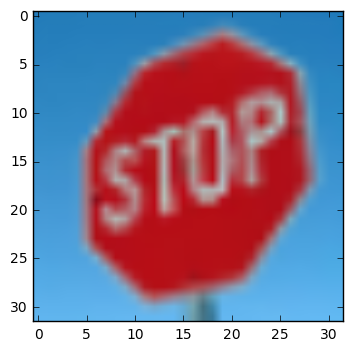

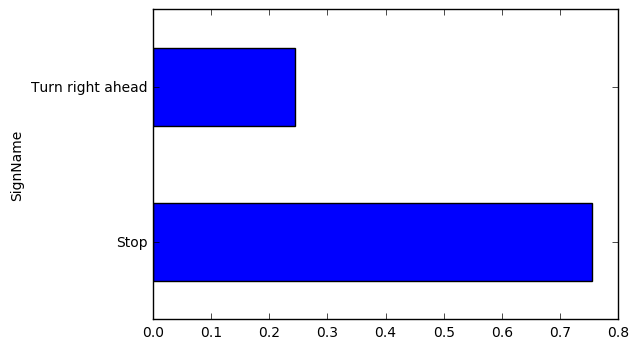

Prediction: Stop


In [197]:
get_prediction('sample01.png')

**Observation:** correct prediction. Stop sign seems to be distinct enough for the model to identify. This is mostly due to the shape and lettering since the model is blind to colors.

#### Example 2

Image


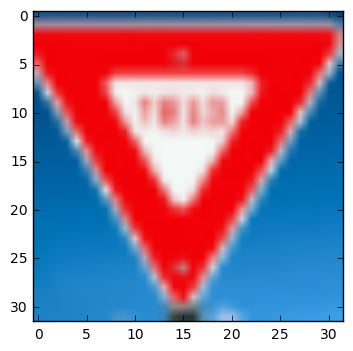

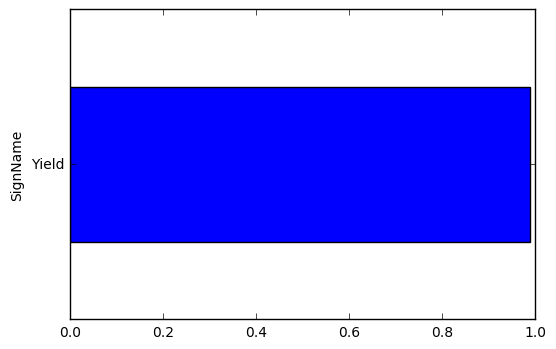

Prediction: Yield


In [198]:
get_prediction('sample02.png')

**Observation:** correct prediction. Similar to stop sign this seems to be based on shape.

#### Example 3

Image


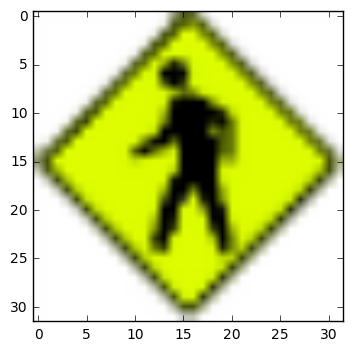

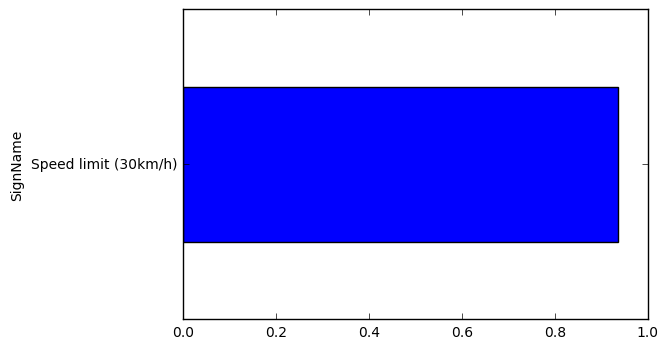

Prediction: Speed limit (30km/h)


In [199]:
get_prediction('sample03.png')

**Observation:** incorrect prediction. Pedestrian crossing examples in the dataset seem to be all triangle and not diamond shaped. It'd help to add alternative examples like the one used in testing. 30km/h speed limit is one of the most prevalent categories, the similarities are not very clear to me.

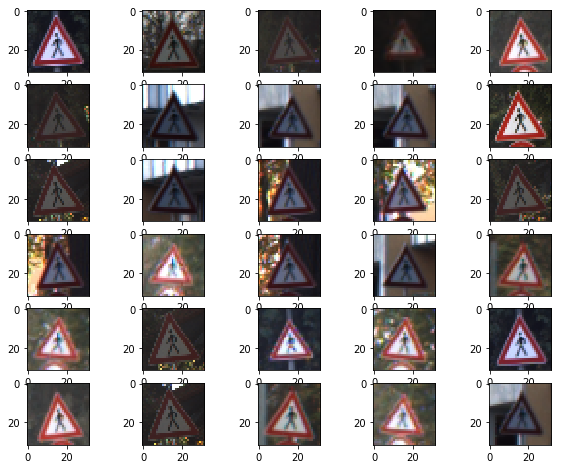

In [74]:
plot_n_samples(27, 30)

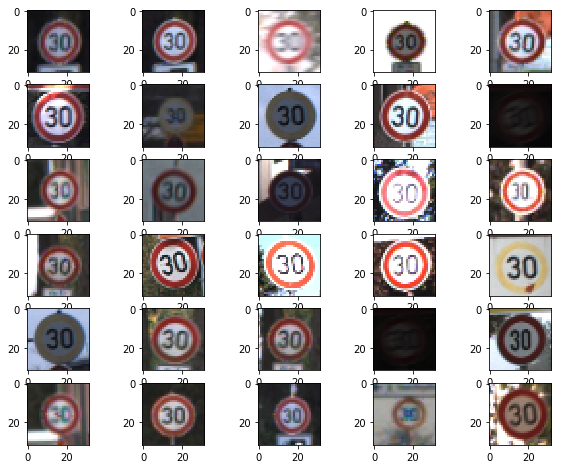

In [73]:
plot_n_samples(1, 30)

#### Example 4

Image


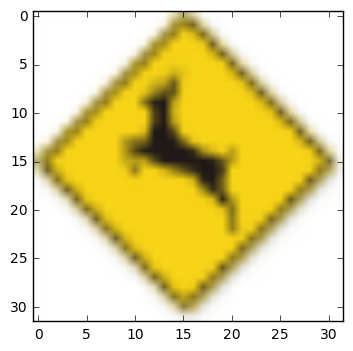

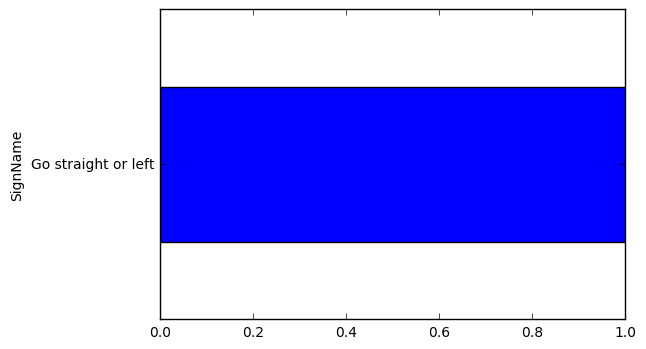

Prediction: Go straight or left


In [200]:
get_prediction('sample04.png')

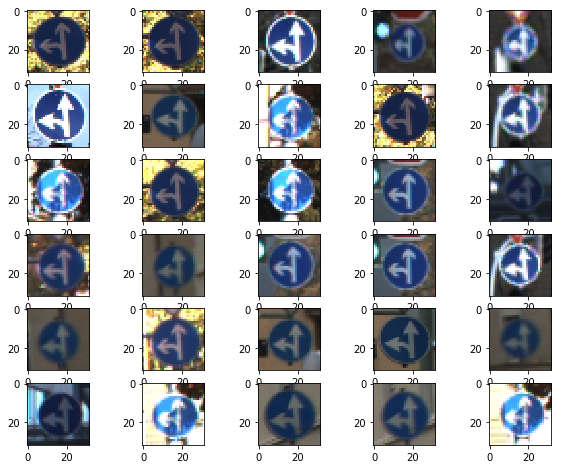

In [76]:
plot_n_samples(37, 30)

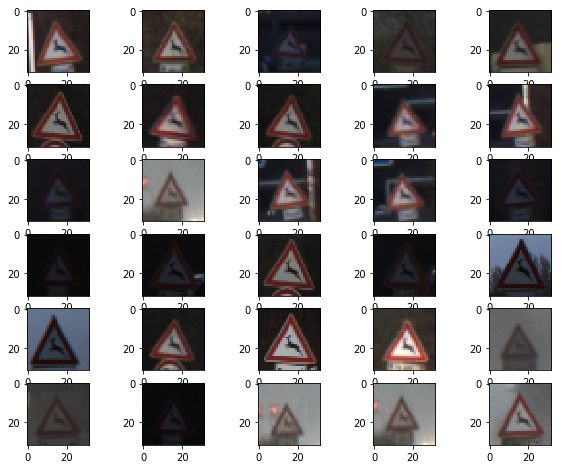

In [78]:
plot_n_samples(31, 30)

**Observation:** incorrect prediction. Animal crossing examples in the dataset seem to be all triangle and not diamond shaped. It'd help to add alternative examples like the one used in testing to the training dataset. It's interesting that the model is predicting one of the least prevalent categories, which seems to have some shape overlap with the animal sign.

#### Example 5

Image


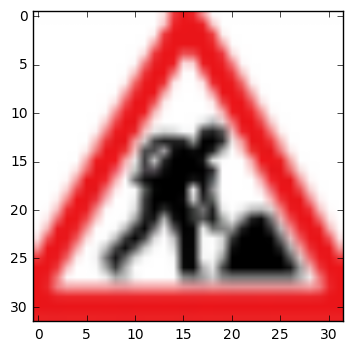

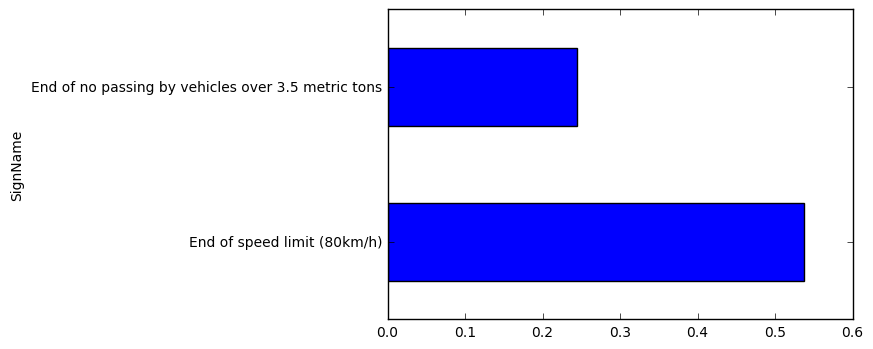

Prediction: End of speed limit (80km/h)


In [201]:
get_prediction('sample05.png')

#### Example 6

Image


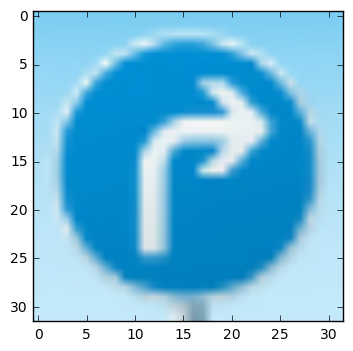

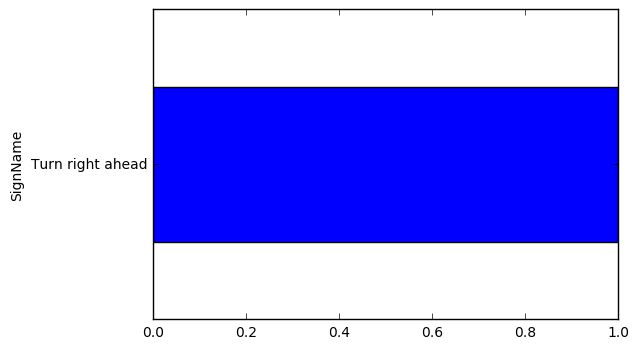

Prediction: Turn right ahead


In [202]:
get_prediction('sample06.png')

**Observation:** correct prediction. Looks almost identical.

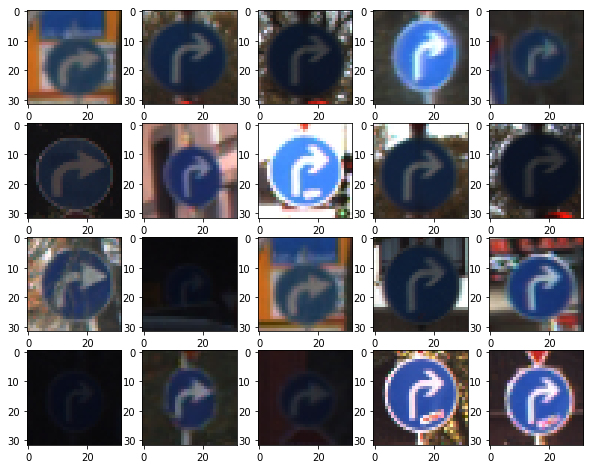

In [79]:
plot_n_samples(33)

#### Example 7

Image


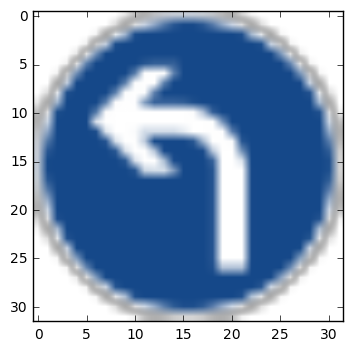

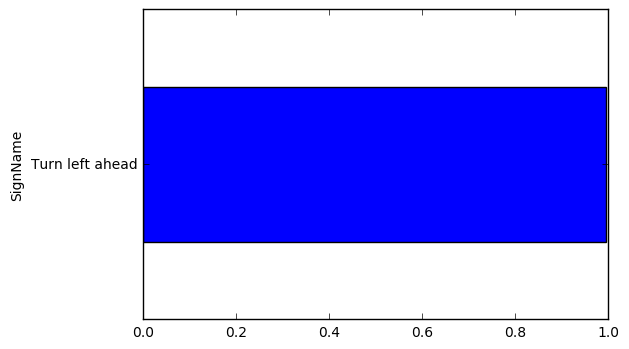

Prediction: Turn left ahead


In [203]:
get_prediction('sample07.png')

**Observation:** correct prediction. Looks almost identical to the images in the training set.

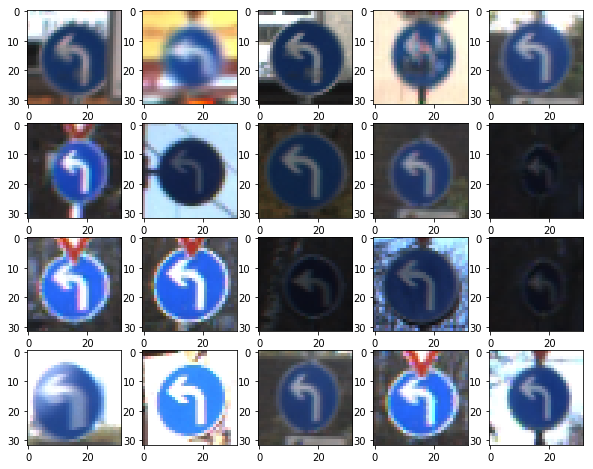

In [80]:
plot_n_samples(34)

#### Example 8

Image


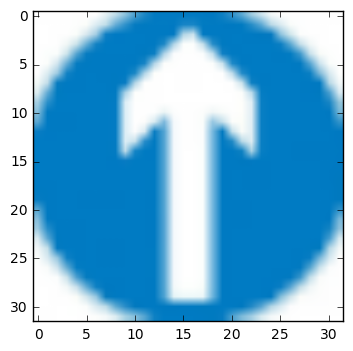

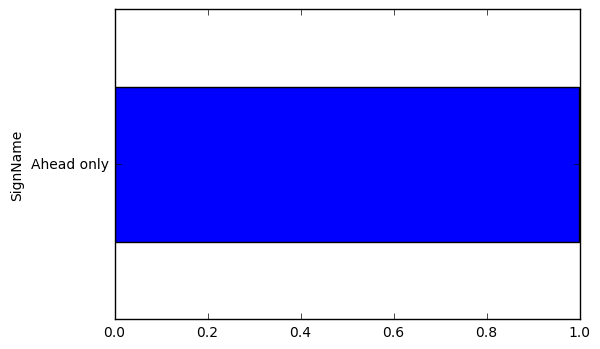

Prediction: Ahead only


In [204]:
get_prediction('sample08.png')

**Observation:** correct prediction. Looks almost identical.

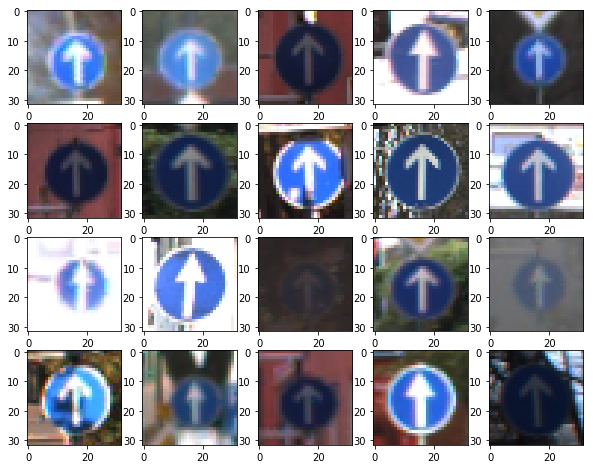

In [81]:
plot_n_samples(35)

#### Example 9

Image


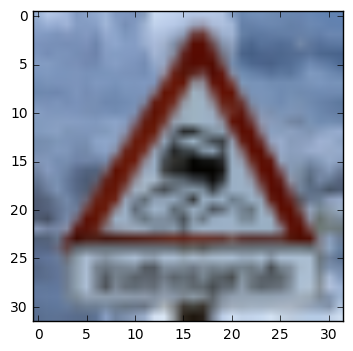

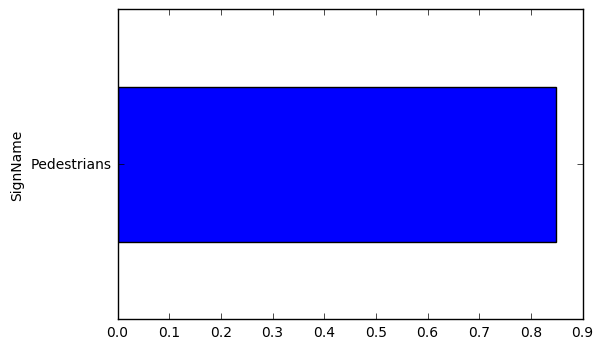

Prediction: Pedestrians


In [205]:
get_prediction('sample09.png')

**Observation:** incorrect prediction. slippery road and pedestrian signs seem very similar.

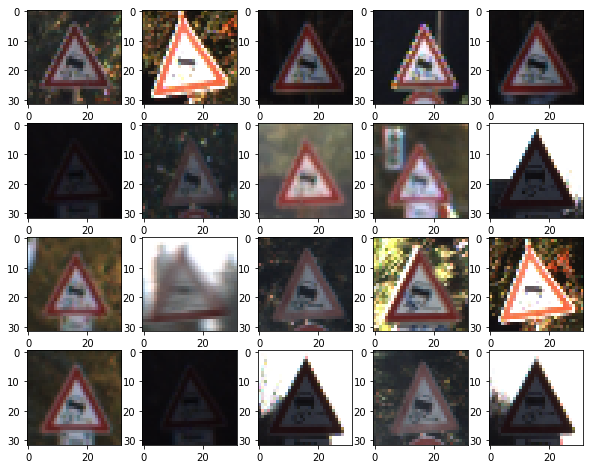

In [83]:
plot_n_samples(23)

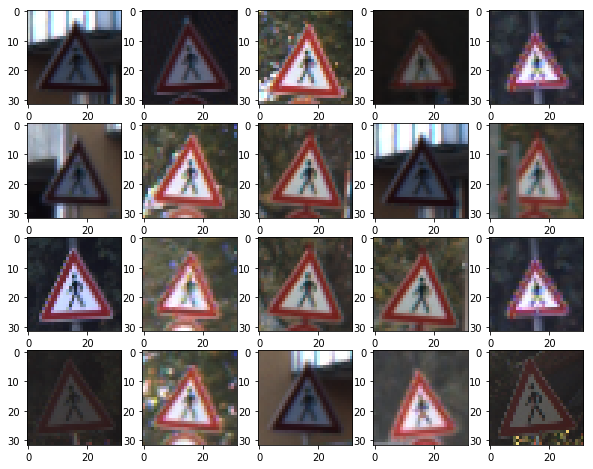

In [84]:
plot_n_samples(27)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** No, the random photos I found online were hard for the model to classify correctly. Model got 5/9 (55%) of images I tried correctly. It is easy to manipulate this number by selecting things that seem to be easier to classify (e.g. straight/left/right arrow).

Test accuracy is 88% whereas the testing I did with a few examples is yielding 55%. It is obvious that this model is not going to generalize to real-world examples. One reason this is the case is that different variations of the same symbol are not used in the training dataset so the model may be only applicable locally to where it was trained which appears to be Germany. The model does however have a good variety of lighti

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** the top prediction seems to appear in the top k based on some spot checking, however the model is overly confident in most cases (~100% probability assignment to classes). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Image


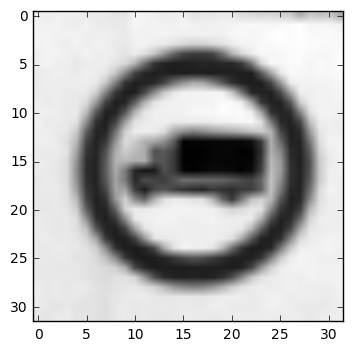

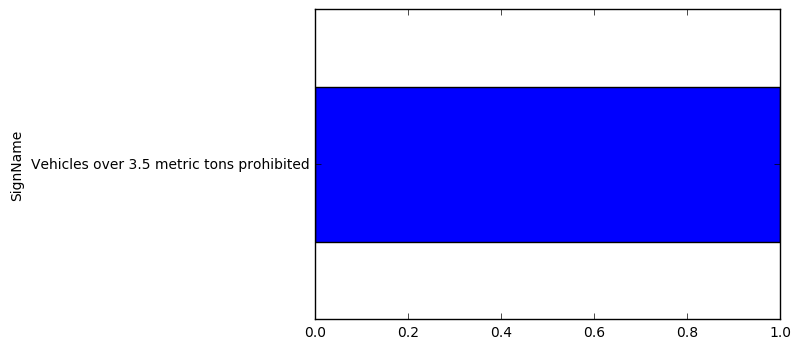

Prediction: Vehicles over 3.5 metric tons prohibited
Image


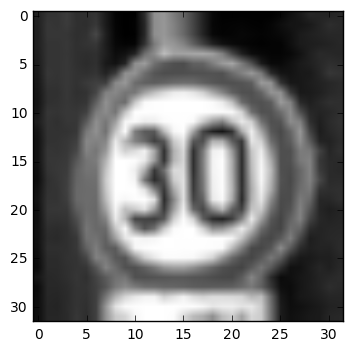

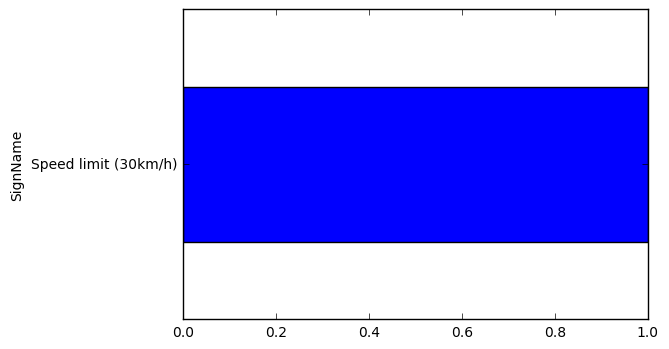

Prediction: Speed limit (30km/h)
Image


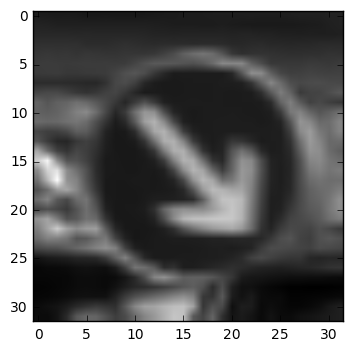

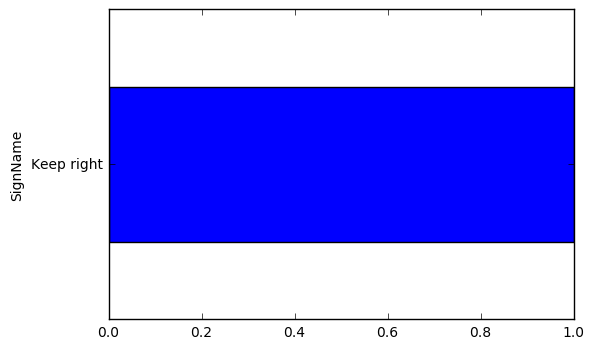

Prediction: Keep right
Image


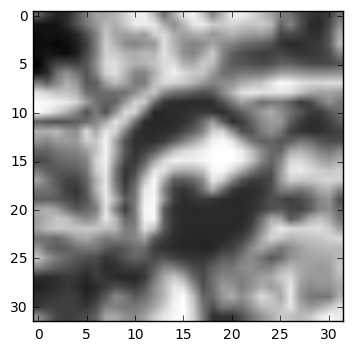

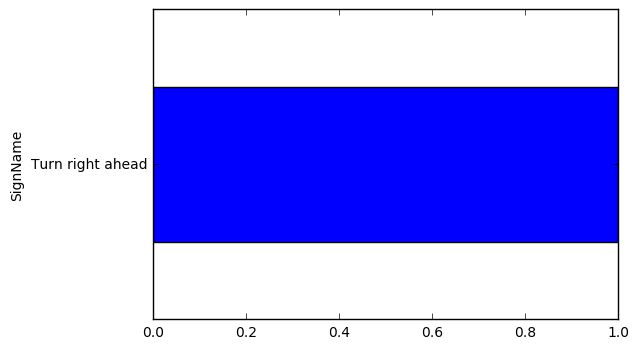

Prediction: Turn right ahead
Image


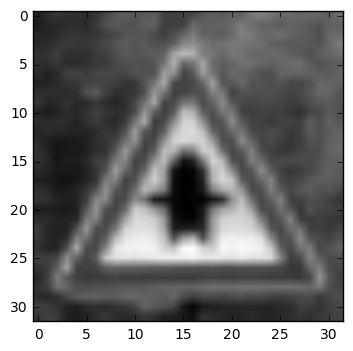

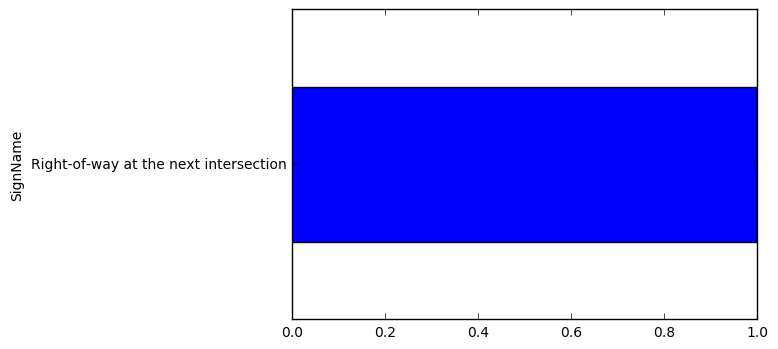

Prediction: Right-of-way at the next intersection
Image


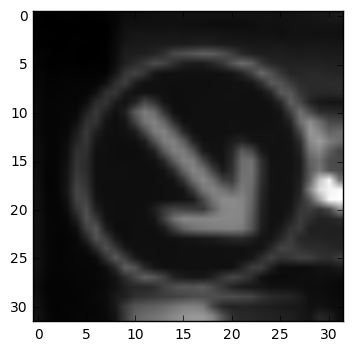

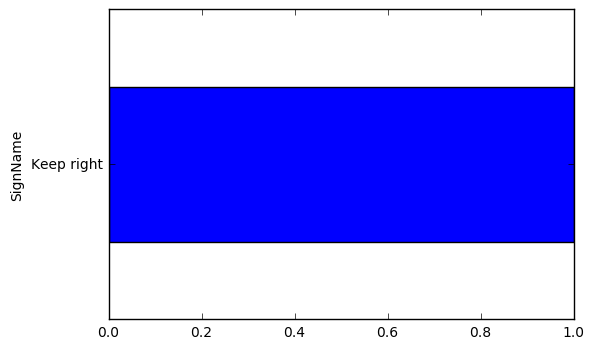

Prediction: Keep right
Image


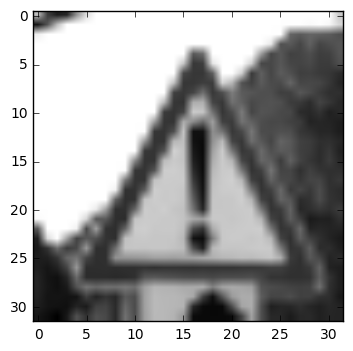

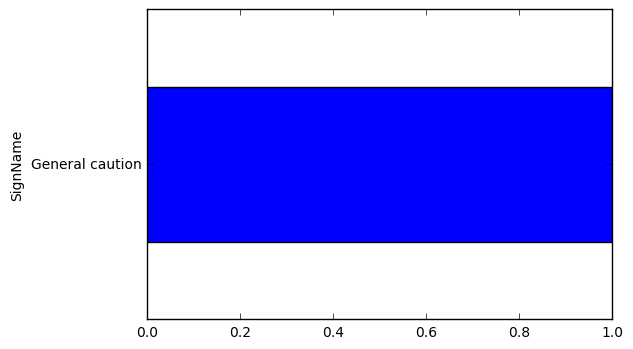

Prediction: General caution
Image


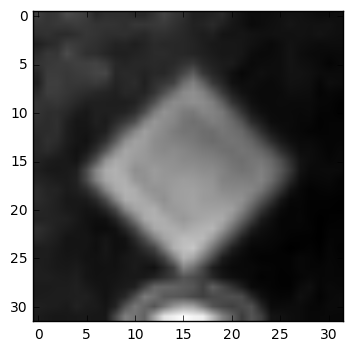

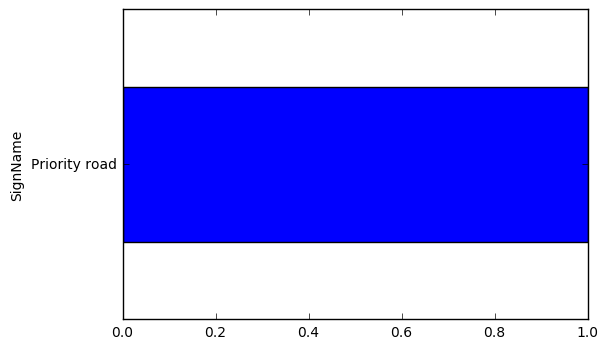

Prediction: Priority road
Image


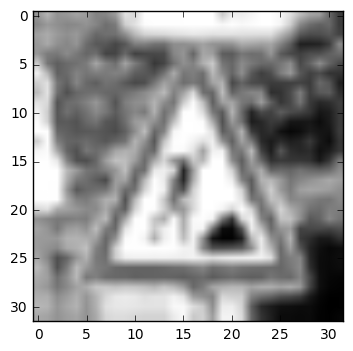

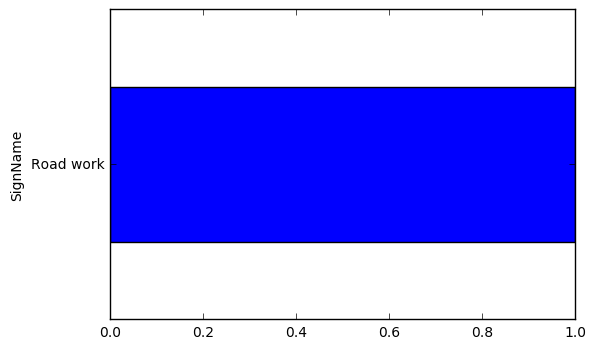

Prediction: Road work
Image


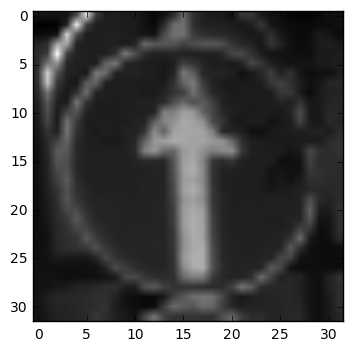

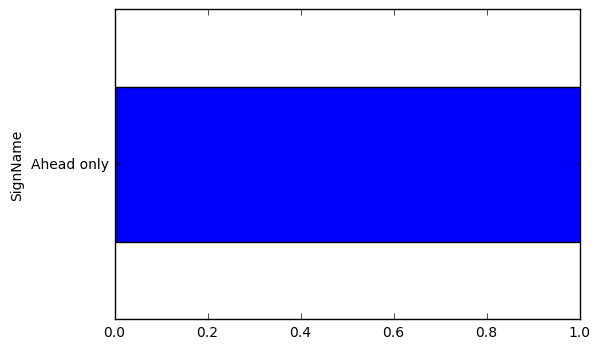

Prediction: Ahead only
Image


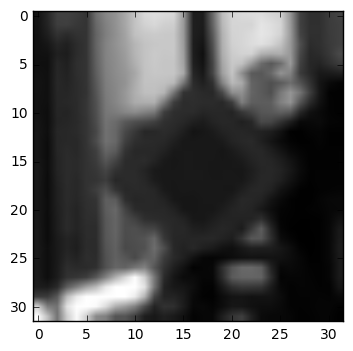

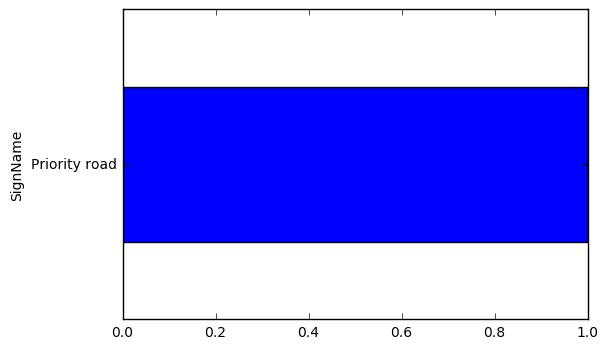

Prediction: Priority road
Image


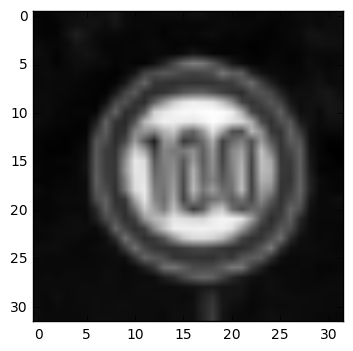

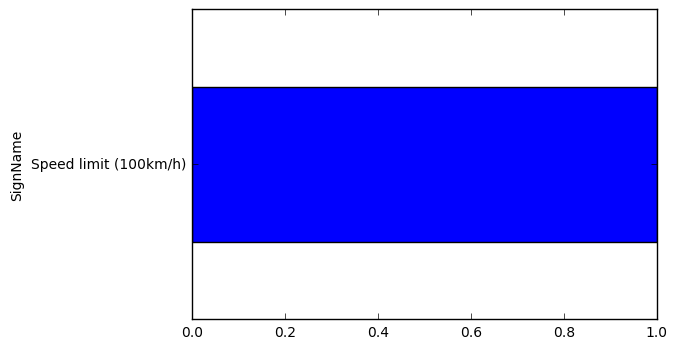

Prediction: Speed limit (100km/h)
Image


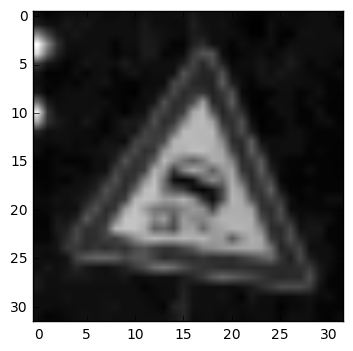

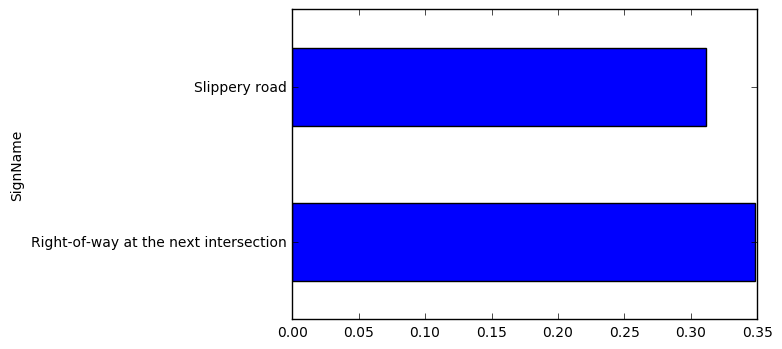

Prediction: Right-of-way at the next intersection
Image


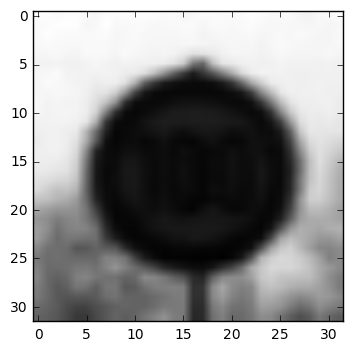

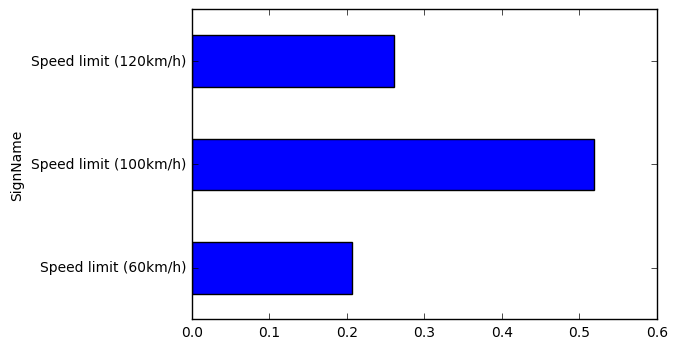

Prediction: Speed limit (100km/h)
Image


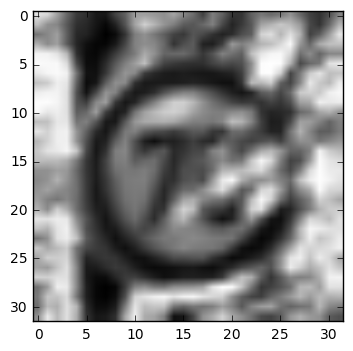

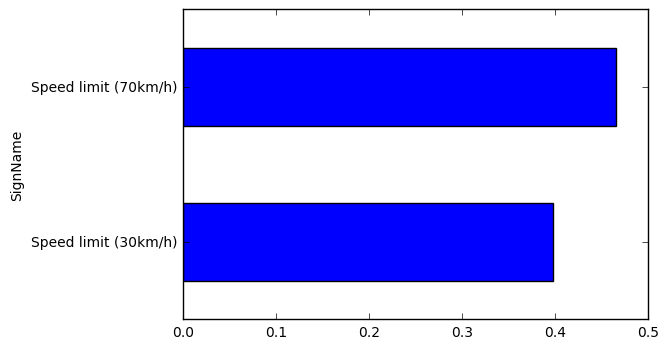

Prediction: Speed limit (70km/h)
Image


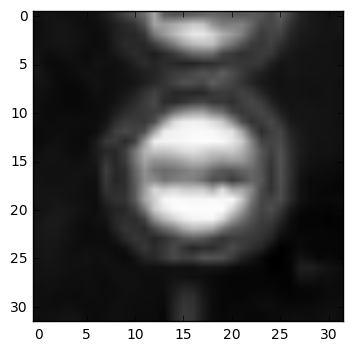

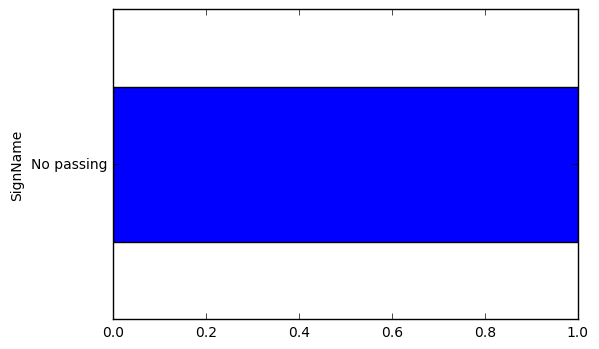

Prediction: No passing
Image


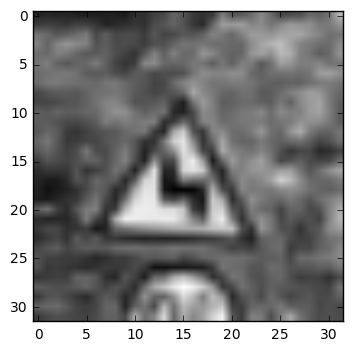

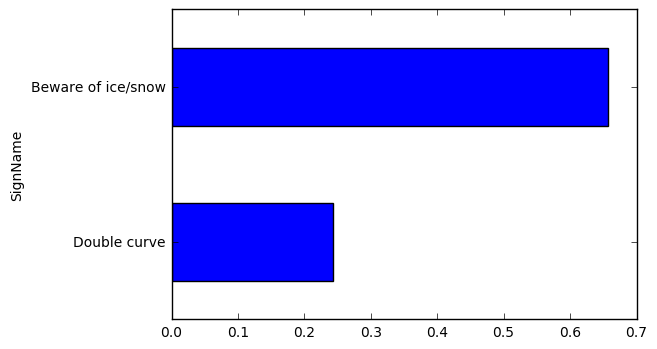

Prediction: Beware of ice/snow
Image


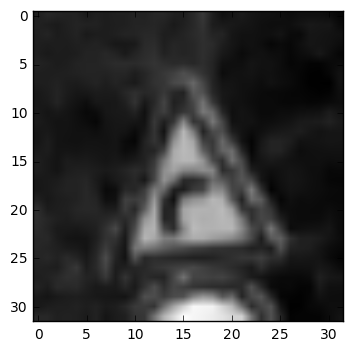

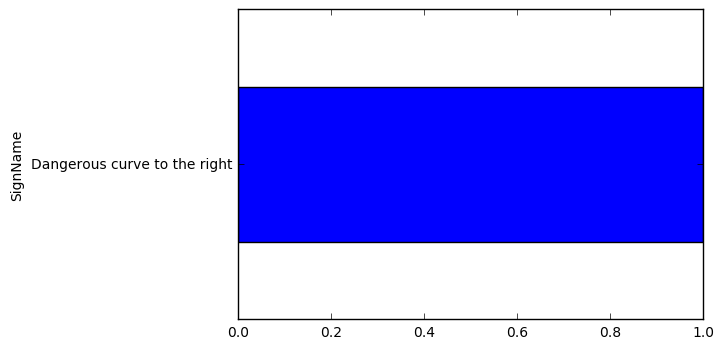

Prediction: Dangerous curve to the right
Image


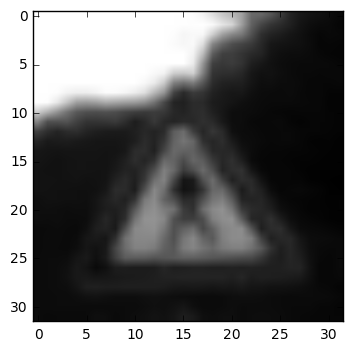

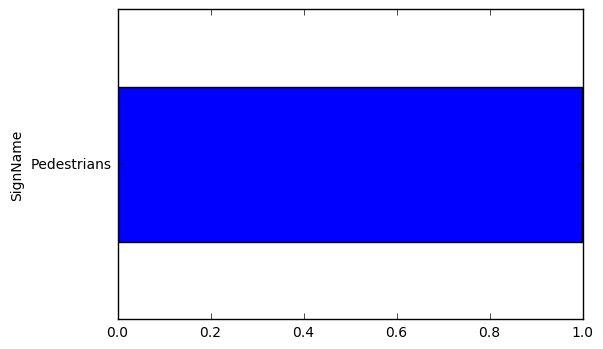

Prediction: Pedestrians
Image


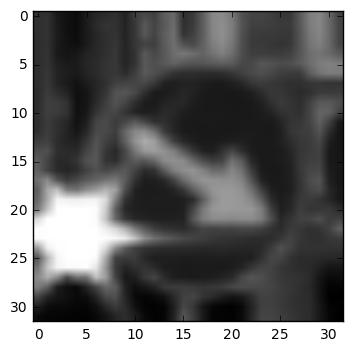

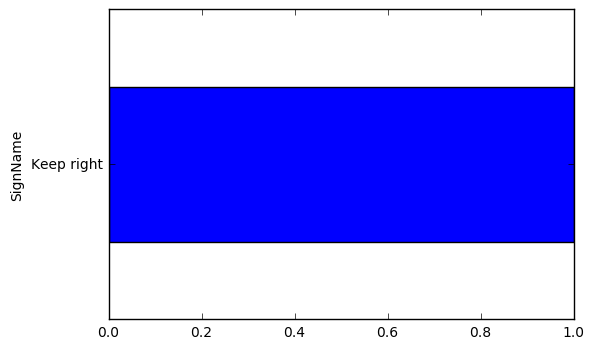

Prediction: Keep right


In [237]:
for i in range(20):
    image_ = X_test[i]
    image_ = image_.reshape(1, *image_.shape)
    get_prediction(image_)
    print('=' * 20)